Building a regression model

In [ ]:
import numpy as np
import pandas as pd 
#used to make the data in csv or any other files to tables and the data created by it is called as an dataframe
import matplotlib.pyplot as plt 
#used to draw graphs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR 
import seaborn as sns 
#used to draw 3D graphs
%matplotlib inline  
#used to draw the graph in the same block

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/k-sashank/DSC_Event_Datasets/main/laptop_price.csv',encoding = 'latin-1')
df.head() #it automatically returns the first five rows in the csv file if required we can specify the number of rows like df.head(n)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
df.info() #used to know about the features in the dataset 
#anything that does not fall into the primitive datatype comes into the object data type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.columns #used to know the different columns in the dataset

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

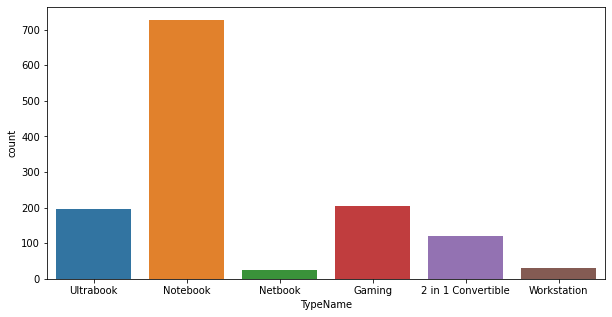

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="TypeName",data=d f) #count plot is usually used for categorical data

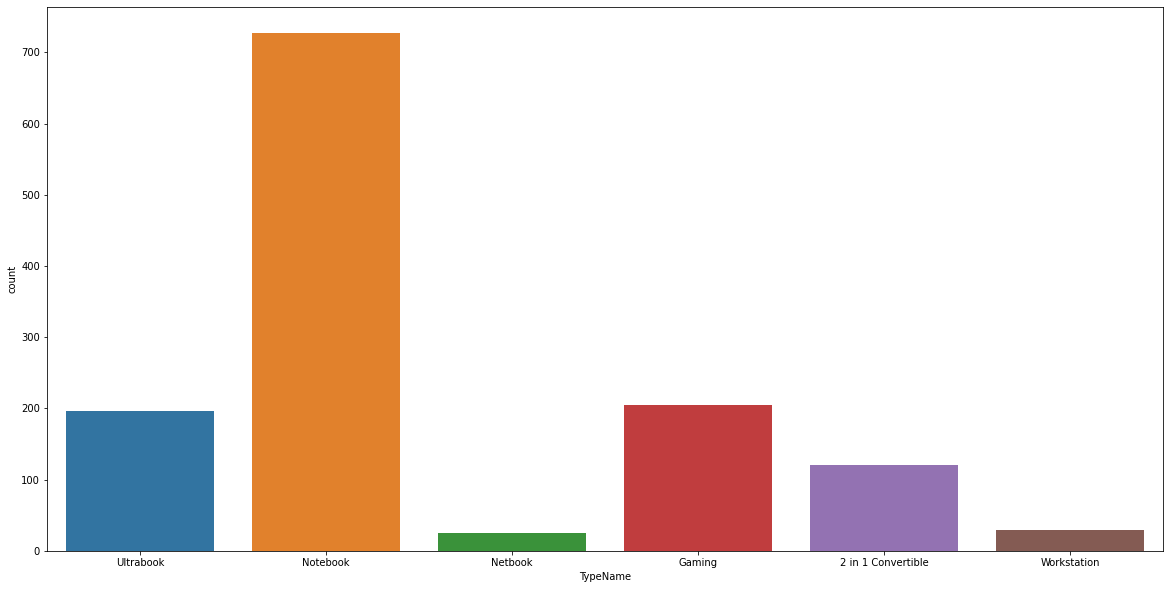

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="TypeName",data=df)

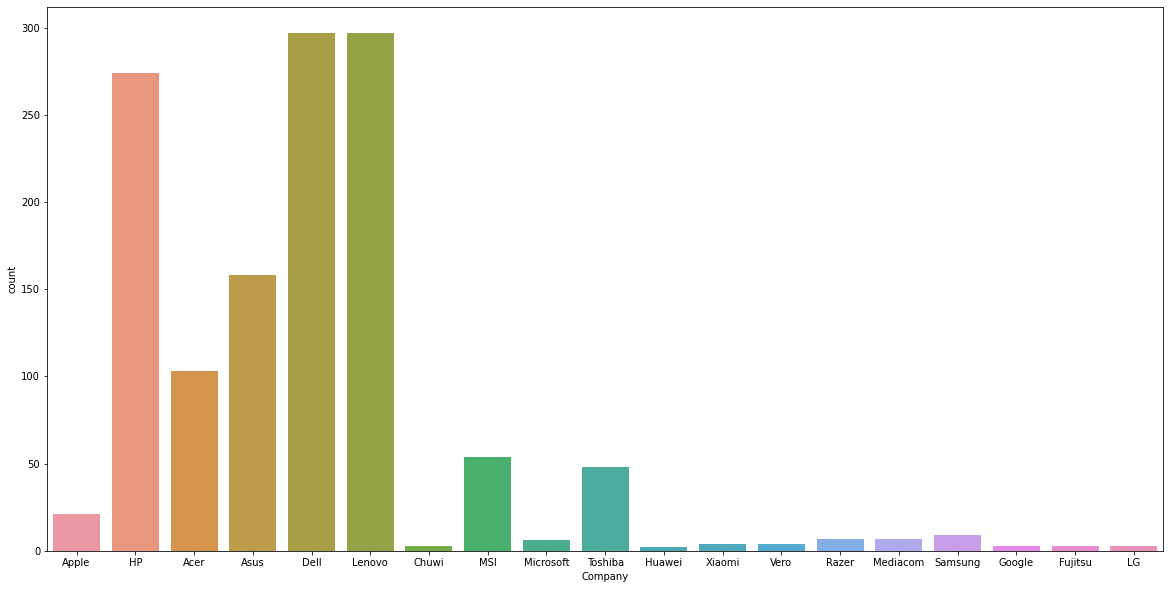

In [ ]:
plt.figure(figsize=(20,10)) #try commenting this and executing it will show tht the figure is not properly displayed. 
sns.countplot(x="Company",data=df)

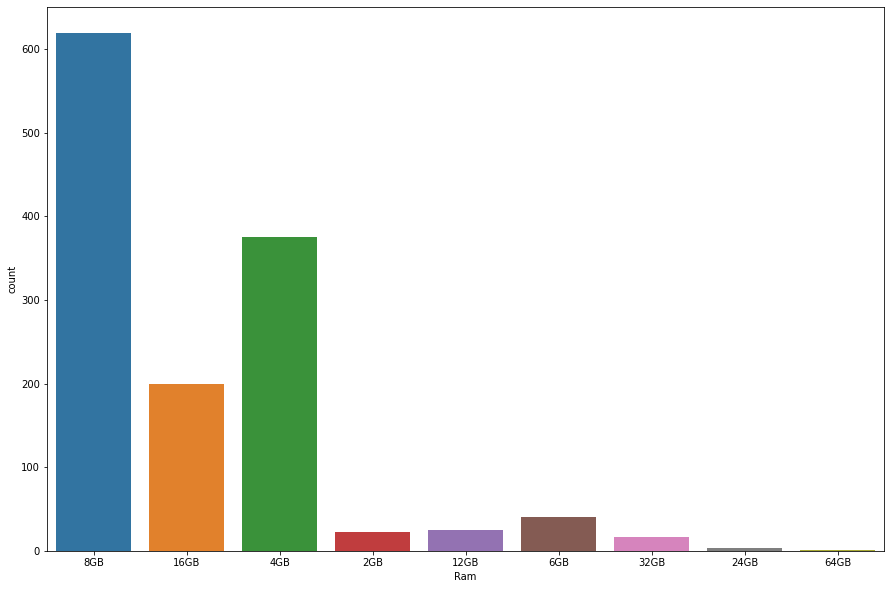

In [ ]:
plt.figure(figsize=(15,10)) #here 15 is the width of the block and 10 is the height of the block
sns.countplot(x="Ram",data=df)

In [ ]:
df.shape #it returns the tuple (no of rows,no of columns)

(1303, 13)

In [ ]:
ram1=list(df['Ram'])
ram2=[]
for i in range(df.shape[0]):
  ram2.append(float(ram1[i].replace('GB','')))

#it is used to convert the data in the ram column which is a string into a float value and to remove the GB in it

In [ ]:
weight1=list(df['Weight'])
weight2=[]
for i in range(df.shape[0]):
  weight2.append(float(weight1[i].replace("kg",'')))


In [ ]:
x=pd.DataFrame({'RAM':ram2, "weight":weight2, "Inches":df['Inches']})
y=np.array(df['Price_euros'])
#here x is a dataframe which is created only using the essential features or the features which we require removing all the unwanted features
#here y stores the price of the corresponding row

In [ ]:
x #these are the features

,RAM,weight,Inches
0,8.0,1.37,13.3
1,8.0,1.34,13.3
2,8.0,1.86,15.6
3,16.0,1.83,15.4
4,8.0,1.37,13.3
...,...,...,...
1298,4.0,1.80,14.0
1299,16.0,1.30,13.3
1300,2.0,1.50,14.0
1301,6.0,2.19,15.6


In [ ]:
y #this is the label

array([1339.69,  898.94,  575.  , ...,  229.  ,  764.  ,  369.  ])

In [ ]:
x.describe()

,RAM,weight,Inches
count,1303.000000,1303.000000,1303.000000
mean,8.382195,2.038734,15.017191
std,5.084665,0.665475,1.426304
min,2.000000,0.690000,10.100000
25%,4.000000,1.500000,14.000000
50%,8.000000,2.040000,15.600000
75%,8.000000,2.300000,15.600000
max,64.000000,4.700000,18.400000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)
#test_size =0.1 means that 10 percent of the data is given for test data set
#random state is used to give the same random values again or to retain it state

In [ ]:
linear_r = LinearRegression() #here linear_r is a model
linear_r.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = linear_r.predict(x_test)
print("R2 of Linear Regression:",r2_score(y_test,y_pred)) #it is r square
print("mse of Linear Regression:",mean_squared_error(y_test,y_pred))
print("mae of Linear Regression:",mean_absolute_error(y_test,y_pred))

R2 of Linear Regression: 0.5758172271469719
mse of Linear Regression: 240546.45053017023
mae of Linear Regression: 350.65988621458166


In [ ]:
import pickle #pickle is used to saving ML algorithms in a file
filename ='lr_model.sav' #this file is in the files section
pickle.dump(linear_r,open(filename,'wb')) #all the data in the linear_r is dumped into the filename which is saved in the file

In [ ]:
out_linear_r = linear_r.predict(np.array([8.0,1.5,14.0]).reshape(1,-1))
out_linear_r #here we are trying to predict the price of a model with the given specifications

array([1138.22373859])

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [ ]:
y_pred = svr.predict(x_test)
print('R2 of support vector machine:',r2_score(y_test,y_pred))
print("mse of support vector machine:",mean_squared_error(y_test,y_pred))
print("mae of support vector machine:",mean_absolute_error(y_test,y_pred))

R2 of support vector machine: 0.09163510765175287
mse of support vector machine: 515117.4555509327
mae of support vector machine: 459.44084496670695


In [ ]:
out_svr_r = svr.predict(np.array([8.0,1.5,14.0]).reshape(1,-1))
out_svr_r

array([982.16838192])

In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dtree.predict(x_test)
print("R2 of Decision Tree:",r2_score(y_test,y_pred))
print("mse of decision tree:",mean_squared_error(y_test,y_pred))
print("mae of decision tree:",mean_absolute_error(y_test,y_pred))

R2 of Decision Tree: 0.7433724667140299
mse of decision tree: 145528.87620837422
mae of decision tree: 252.38086911198502


In [ ]:
out_dtree_r = dtree.predict(np.array([8.0,1.5,14.0]).reshape(1,-1))
out_dtree_r

array([1119.995])